In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize to 0–1
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

class_names = [
    "airplane", "car", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

print("Training samples:", x_train.shape)
print("Test samples:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 534s 3us/step
Training samples: (50000, 32, 32, 3)
Test samples: (10000, 32, 32, 3)


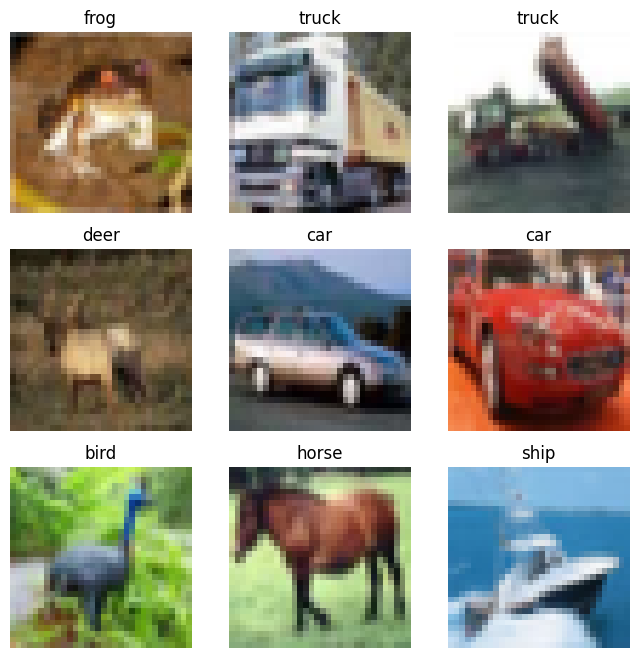

In [2]:
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()

In [3]:
model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test)
print("Final Test Accuracy:", test_acc)

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("cifar10_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved!")

INFO:tensorflow:Assets written to: C:\Users\WANJIR~1\AppData\Local\Temp\tmp87r2ssrk\assets


INFO:tensorflow:Assets written to: C:\Users\WANJIR~1\AppData\Local\Temp\tmp87r2ssrk\assets


Saved artifact at 'C:\Users\WANJIR~1\AppData\Local\Temp\tmp87r2ssrk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2686539542992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539545488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539545680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686502167440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539325584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539330000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686502168208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539321552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539317328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539330384: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLit

In [5]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

with open("cifar10_model_quant.tflite", "wb") as f:
    f.write(tflite_quant_model)

print("Quantized TFLite model saved!")

INFO:tensorflow:Assets written to: C:\Users\WANJIR~1\AppData\Local\Temp\tmp0zl7_l7o\assets


INFO:tensorflow:Assets written to: C:\Users\WANJIR~1\AppData\Local\Temp\tmp0zl7_l7o\assets


Saved artifact at 'C:\Users\WANJIR~1\AppData\Local\Temp\tmp0zl7_l7o'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2686539542992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539545488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539545680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686502167440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539325584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539330000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686502168208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539321552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539317328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2686539330384: TensorSpec(shape=(), dtype=tf.resource, name=None)
Quant

In [6]:
interpreter = tf.lite.Interpreter(model_path="cifar10_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# choose one test image
test_img = x_test[0:1]  # shape (1, 32, 32, 3)

interpreter.set_tensor(input_details[0]['index'], test_img)
interpreter.invoke()

pred = interpreter.get_tensor(output_details[0]['index'])
pred_label = np.argmax(pred)

print("Predicted:", class_names[pred_label])
print("Actual:", class_names[y_test[0][0]])

C:\Users\Wanjiru_Ian\AppData\Local\Programs\Python\Python313\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Predicted: ship
Actual: cat
